# Convolution Neural Network

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt


In [0]:
mnist=input_data.read_data_sets('mnist',one_hot=True)
mnist

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fc4378ec710>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fc4378ec550>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fc3f2c90cc0>)

In [0]:


print(mnist.train.images.shape)
print(mnist.train.labels.shape)

(55000, 784)
(55000, 10)


In [0]:
print(mnist.test.images.shape)
print(mnist.test.labels.shape)

(10000, 784)
(10000, 10)


In [0]:


new=mnist.train.images[1]
new_1=np.resize(new,(28,28))


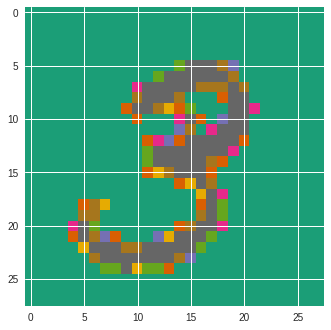

In [0]:
plt.imshow(new_1,cmap='Dark2')

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import math

#### Variables to be used later in our implementation.




### Building the model

In [0]:
# Parameters
learning_rate = 0.01
training_epochs = 50 # training epoch
batch_size = 128
display_step = 10


In [0]:

# Network Parameters
n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)
dropout = 0.75  # Dropout, probability to keep units


#### tf graph input

In [0]:
x=tf.placeholder(tf.float32,[None,n_input])
y=tf.placeholder(tf.float32,[None,n_classes])

keep_prob = tf.placeholder(tf.float32)

In [0]:
# Creating the Convolution.
def conv2d(x,w,b,stride=1):
  
  
  x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
  x = tf.nn.bias_add(x, b)
  return tf.nn.relu(x)


In [0]:
#Creating the MaxPool.
#Maxpool layer.
def maxpool2d(x,k=2):
    return tf.nn.max_pool(x,ksize=[1,k,k,1],stride=[1,k,k,1],padding='SAME')


In [0]:
def model(x,weight,biase,dropout):
    
    # Reshape input picture
    x = tf.reshape(x, shape=[-1, 28, 28, 1])
    #Layer 1
    conv1=tf.nn.conv2d(x,weight['w1'],strides=[1,1,1,1],padding='SAME')
    hidden1=tf.nn.relu(conv1+biase['b1'])
    # Max Pooling (down-sampling)
    pool1=tf.nn.max_pool(hidden1,[1,2,2,1],[1,2,2,1],padding='SAME')
    #Layer 2
    conv2=tf.nn.conv2d(pool1,weight['w2'],strides=[1,1,1,1],padding='SAME')
    hidden2=tf.nn.relu(conv2+biase['b2'])
    # Max Pooling (down-sampling)
    pool2=tf.nn.max_pool(hidden2,[1,2,2,1],[1,2,2,1],padding='SAME')
    
     # Flattern the convolution output
        
#    shape = pool2.get_shape().as_list()
#    reshape=tf.reshape(pool2,[shape[0],shape[1]*shape[2]*shape[3]])

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1=tf.reshape(pool2,[-1,weight['wc1'].get_shape().as_list()[0]])
    fc1=tf.add(tf.matmul(fc1,weight['wc1']),biase['bc1'])
    fc1=tf.nn.relu(fc1)
    # add dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)
    #output.
    
    output=tf.add(tf.matmul(fc1,weight['w_out']),biase['b_out'])
    return output
#create the layer of weight and biases.
  
    
   # 5x5 conv, 1 input, 32 outputs
  
weight={'w1':tf.Variable(tf.random_normal([5,5,1,32])),
       'w2':tf.Variable(tf.random_normal([5,5,32,64])),
       # fully connected, 7*7*64 inputs, 1024 outputs 
       'wc1':tf.Variable(tf.random_normal([7*7*64,1024])), 
       #1024 input and 10 output
       'w_out':tf.Variable(tf.random_normal([1024,n_classes]))}
  
    
biase={'b1':tf.Variable(tf.random_normal([32])),
       'b2':tf.Variable(tf.random_normal([64])),
       'bc1':tf.Variable(tf.random_normal([1024])),
       'b_out':tf.Variable(tf.random_normal([n_classes]))}
                             
    
    
# Construct model
pred=model(x,weight,biase,keep_prob)

# Define loss and optimizer
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=pred))
#Optimizer.

optimizer=tf.train.AdamOptimizer().minimize(cost)


# Evaluate model
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    
    
# Initializing the variables
init=tf.global_variables_initializer()

# Initialize the session.
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        
        avg_cost=0.0
        avg_accuracy=0.0
        n_batch=int(mnist.train.num_examples/batch_size)
        for i in range(n_batch):
            batch_x,batch_y=mnist.train.next_batch(batch_size)
            _,batch_cost,batch_acc=sess.run([optimizer,cost,accuracy],feed_dict={x:batch_x,y:batch_y,keep_prob:dropout})
            avg_cost+=batch_cost/n_batch
            avg_accuracy+=batch_acc/n_batch
            
        print('The epoch',epoch)
        print('The avg _cost is{} and the avg_accuracy is {}'.format(avg_cost,avg_accuracy))
    
          
            
          
    print("Optimization Finished!")
    
    print("Testing Accuracy:", \
          sess.run(accuracy, feed_dict={x: mnist.test.images[:256],
                                        y: mnist.test.labels[:256],
                                        keep_prob: 1.}))
                
                
            

    
    

The epoch 0
The avg _cost is5734.256632202426 and the avg_accuracy is 0.7872778263403257
The epoch 1
The avg _cost is832.3269768205843 and the avg_accuracy is 0.9218385780885782
The epoch 2
The avg _cost is438.4687374177239 and the avg_accuracy is 0.9420527389277397
The epoch 3
The avg _cost is258.3714501529862 and the avg_accuracy is 0.9566579254079268
The epoch 4
The avg _cost is186.21455447323657 and the avg_accuracy is 0.9629953379953393
The epoch 5
The avg _cost is133.10081047556054 and the avg_accuracy is 0.96989729020979
The epoch 6
The avg _cost is106.432566760668 and the avg_accuracy is 0.9723193473193475
The epoch 7
The avg _cost is77.3293100459315 and the avg_accuracy is 0.9769085081585078
The epoch 8
The avg _cost is62.659016896482065 and the avg_accuracy is 0.9796219405594399
The epoch 9
The avg _cost is51.587387914146326 and the avg_accuracy is 0.9819347319347327
The epoch 10
The avg _cost is40.46281712072613 and the avg_accuracy is 0.983974358974359
The epoch 11
The avg 

The epoch 46
The avg _cost is3.6333808405650325 and the avg_accuracy is 0.9977600524475567
The epoch 47
The avg _cost is3.4322766759408228 and the avg_accuracy is 0.997577942890447
The epoch 48
The avg _cost is3.9974624934000564 and the avg_accuracy is 0.9974868881118925
The epoch 49
The avg _cost is2.8441827305633844 and the avg_accuracy is 0.9979785839160886
Optimization Finished!
Testing Accuracy: 0.99609375
